## Problem statement
Use relevant machine learning model to predict total sales using fetures like money spent on Advertising/Marketing individual fields.

### Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load dataset

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
# Drop the unnamed column
data.drop('Unnamed: 0',axis=1,inplace=True)

#### Domain Analysis
* Sales is target.
* Tv, Rdio and Newspaper are input variables.
* This data basically tells us about the total sales made by the company by investing certain amount on Tv, Radio and Newspaper Adertising.



In [4]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Basic Checks

In [5]:
# shape
data.shape

(200, 4)

In [6]:
# print all columns
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
# dtype 
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
# head
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
# tail
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
# describe
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Insights
* Average sales made by the company is 14.02m$
* Average amount spent on TV is more compared to Radio and Newspaper
* Maximum amount spent on TV advertising is more compared to radio and newspaper

In [12]:
#check for missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Exploratory Data Analysis


### Univariate analysis
* Analysis single variable/column/feature
* 


<Axes: ylabel='Density'>

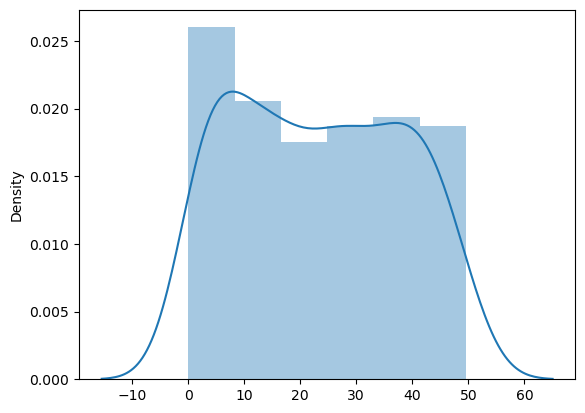

In [13]:
# cheak distribution of radio
sns.distplot(x=data.Radio)

<Axes: ylabel='Density'>

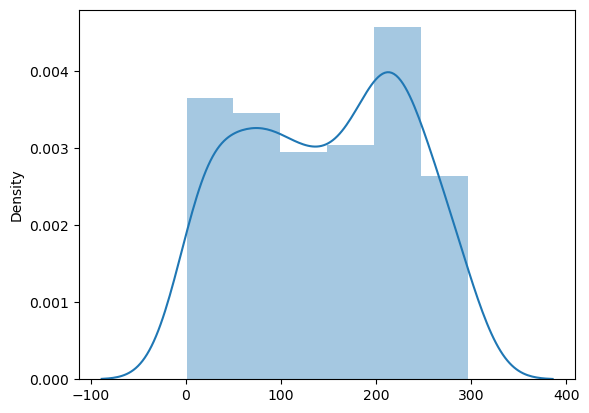

In [14]:
# cheak distribution of tv
sns.distplot(x=data.TV)

<Axes: ylabel='Density'>

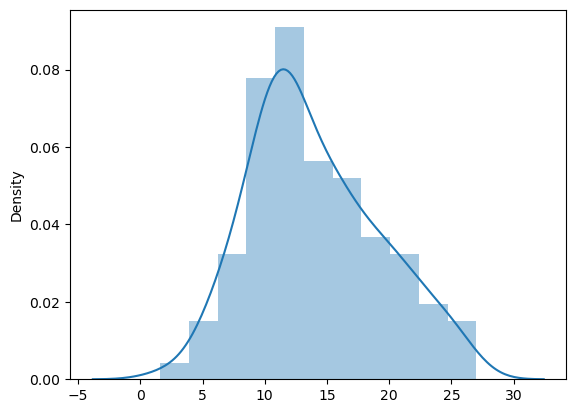

In [15]:
# cheak distribution of sales
sns.distplot(x=data.Sales,kde=True)

### Insights
* sales is representing normal distribution
* TV ,Radio and Newspaper are representing skewness/not normal

### Bivariate analysis
 Analysing two variable

<Axes: xlabel='TV', ylabel='Sales'>

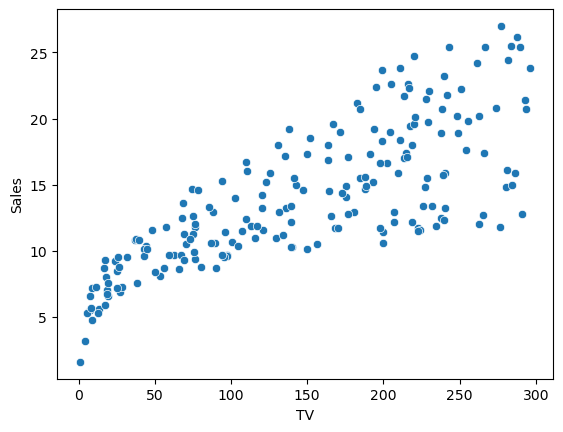

In [16]:
# Analyse how Tv varies with sales
sns.scatterplot(data=data,x='TV',y='Sales')


### Insights
* As we increase the amount of money spent on TV advertising then sales will increase.
* There is a high correlation between TV and sales
* More we invest in TV higher will be the sales
* There is a positive relationship between Tv and Sales.


<Axes: xlabel='Radio', ylabel='Sales'>

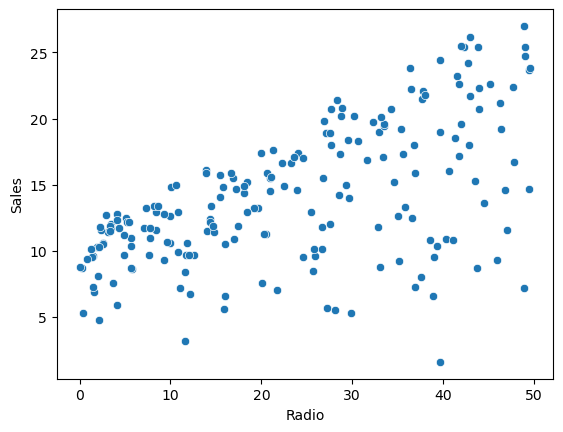

In [17]:
# Analyse how amount spent on radio impact sales 
sns.scatterplot(data=data,x='Radio',y='Sales')

### Insights
* There is no much trend or strong relationship between Radio and Sales.
* Investing in radio advertising will have less impact on sales.
* We can see that high investment in radio advertiding sometimes sales was high and somtimes sales was low


<Axes: xlabel='Newspaper', ylabel='Sales'>

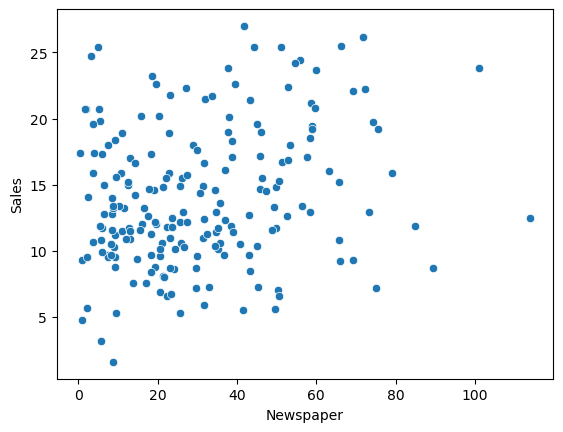

In [18]:
# Analyse how amount spent on Newspaper impact sales
sns.scatterplot(data=data,x='Newspaper',y='Sales')

### Insights
* There is no relationship between Newspaper and sales
* Investing more or less on Newspaper advertising will yield very less sales.



### Final insights
* Television is the best field for advertising the product so that the comany can yield more sales.
* Investing in Radio will also yield some good sales but investing newspaper is not really a good idea.

### Multivariate analysis

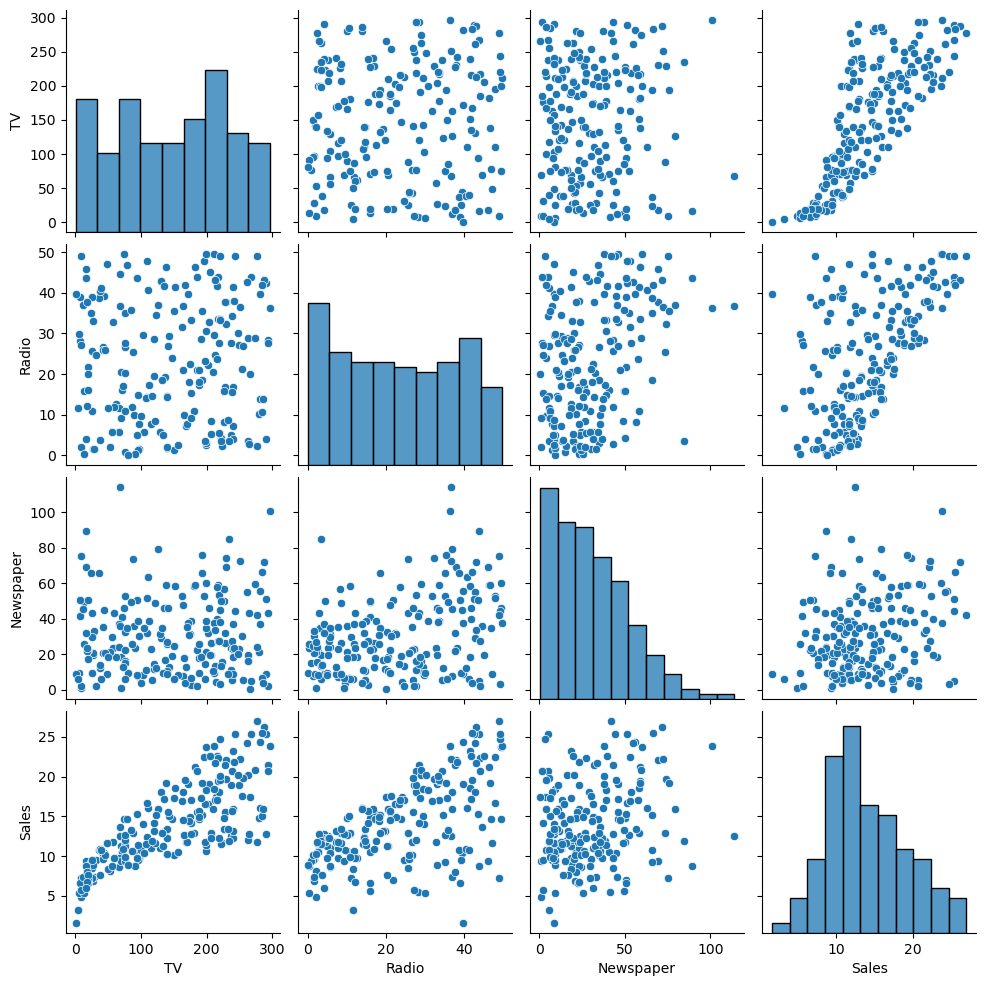

In [19]:
sns.pairplot(data)

In [20]:
data.Sales.skew()

0.4075714250767127

## Data preprocessing

In [21]:
# cheak foe missing values and handle them
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## check for duplicate

In [22]:
data.duplicated().sum()

0

In [23]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

## Check for outliers

<Axes: xlabel='TV'>

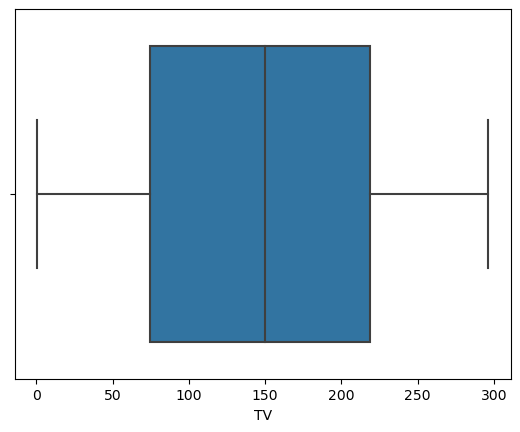

In [24]:
# check outliers in Tv
sns.boxplot(x=data.TV)

<Axes: xlabel='Radio'>

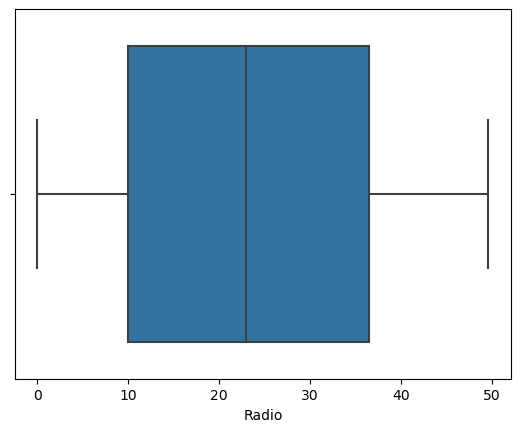

In [25]:
# check outliers in Radio
sns.boxplot(x=data.Radio)

<Axes: xlabel='Newspaper'>

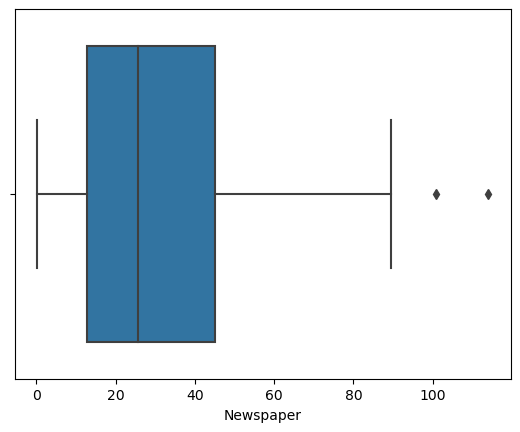

In [26]:
# check outliers in Newspaper
sns.boxplot(x=data.Newspaper)

<Axes: xlabel='Sales'>

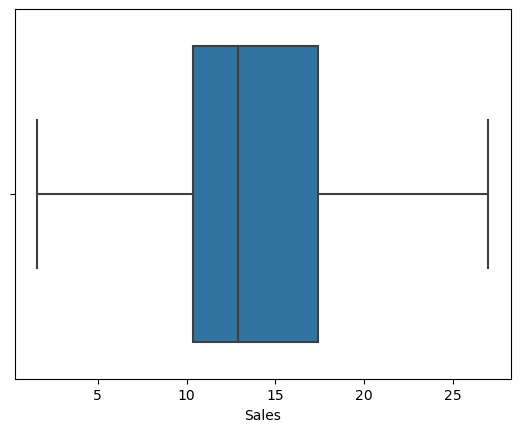

In [27]:
# check outliers in Sales
sns.boxplot(x=data.Sales)

In [28]:
# We can see that there are few outliers inNewspaper column
# outliers in Newspaper are seen toward right side

In [29]:
# how to find those outliers
# IQR- Use this method when data is not normal
# 3-Sigma rule- Use this method when data is normal

### IQR
* find Q1 and Q3
* find IQR=Q3-Q1
* find lower limit and upper limit
* lower_limit=Q1-1.5*IQR
* Upper_limit=Q3+1.5*IQR
* Find record/values which are greter than upper limit and less than lower limit

In [30]:
# find Q1 and Q3
Q1 = data['Newspaper'].quantile(0.25)
print("lower quartile",Q1)
Q3 = data['Newspaper'].quantile(0.75)
print("upper quartile",Q3)

lower quartile 12.75
upper quartile 45.1


In [31]:
# find IQR
IQR = Q3-Q1
IQR

32.35

In [32]:
# find lower limit and upper limit
lower_limit = Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit = Q3+1.5*IQR
print("upper limit is",upper_limit)

lower limit is -35.775000000000006
upper limit is 93.625


In [33]:
# find values above upper_limit
data.loc[data['Newspaper']>upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [34]:
len(data.loc[data['Newspaper']>upper_limit])/len(data)

0.01

In [35]:
# find values below lower limit
data.loc[data['Newspaper']<lower_limit]

,TV,Radio,Newspaper,Sales


In [36]:
# how to handle outlier
# since data is not noraml will replace outliers with median
data.loc[data['Newspaper']>upper_limit,"Newspaper"]=data['Newspaper'].median()

<Axes: xlabel='Newspaper'>

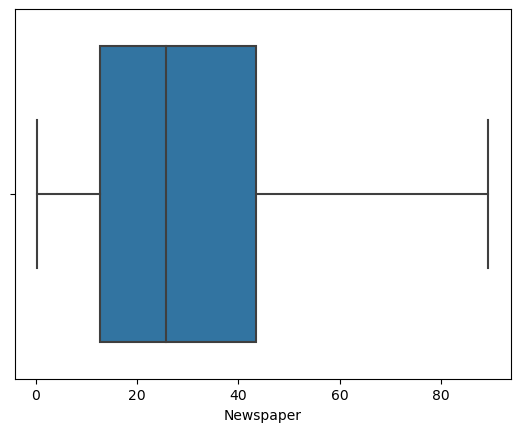

In [37]:
# check are there any outlier in Newspaper
sns.boxplot(x=data.Newspaper)

In [38]:
# skipping scaling

In [39]:
# skipping coverting categorical data into numerical data

## Feature Engineering

#### drop irrelevant columns 
#### selecting best features
* Drop the columns which has very less correlation with target variable
* Drop one of the column if two input variable has high correlation

In [40]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.782224
Radio,0.054809,1.000000,0.343141,0.576223
Newspaper,0.048462,0.343141,1.000000,0.215938
Sales,0.782224,0.576223,0.215938,1.000000


<Axes: >

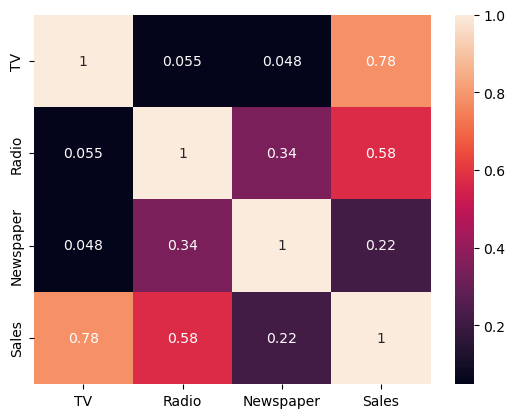

In [41]:
sns.heatmap(data.corr(),annot=True)
# annot = True is used for labelling the corr values
# In this Newspaper has very less correlation with sales, since dataset is small we are not dropping Newspaper

<Axes: >

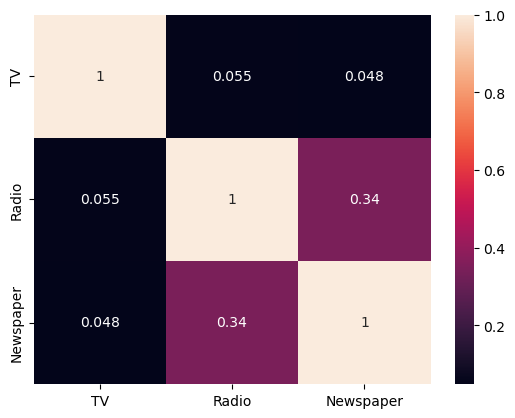

In [42]:
# check for multicollinerity
sns.heatmap(data.drop("Sales",axis=1).corr(),annot=True)


#### Heta map analysis
#### linearity
* We include columns which has high correlation with target
* We drop columns which has less correlation with target
#### Little or no multicollinearity
* We include columns which has less correlation among each other
* We drop one of the column if two input variable have high correlation

## Split data into x and y

In [43]:
x=data.drop("Sales",axis=1)
y=data['Sales']

## Split data for training and testing

# Sklearn
It is one of the scientific library which includes all the packages related to Machine learning, data cleaning and feture

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=4)

In [45]:
x_train.shape

(140, 3)

In [46]:
x_test.shape

(60, 3)

## Model Building

In [47]:
# Import linear Regreessin model
from sklearn.linear_model import LinearRegression
# unitialise model
model=LinearRegression()
# Train model with x_train and y_train
model.fit(x_train,y_train)

LinearRegression()

In [48]:
# make prediction/ test model
y_pred=model.predict(x_test)
y_pred

array([17.11920196, 16.86343137, 21.80867738, 24.55443423, 12.3155194 ,
       20.92742165, 10.10412313, 12.37902465, 11.99570844, 16.95369111,
       22.81007152, 15.1981792 ,  8.4657263 , 14.88506108, 18.54549016,
       18.5612111 , 18.70116245, 14.50770633,  9.74439917, 20.58825997,
       14.89035187, 17.71204411, 23.05479076,  7.72066599, 21.4435882 ,
       19.61759881, 13.81348356, 11.64299601, 18.42933279, 12.21072397,
       11.41183731,  9.96393166, 13.49958752, 15.19317807, 18.10601562,
        6.92406996, 14.20072023, 14.27620674, 14.10646271, 10.77352628,
       14.84385103, 11.94916737, 10.70309421, 10.40075312,  6.20529208,
       16.82109527, 16.46119818, 12.07762468, 10.73444639, 20.86473587,
       15.08126005, 15.41063402, 12.79667983, 14.11738167, 12.36964978,
        9.02390838, 20.50392858,  9.34145403,  5.36475925,  8.24787047])

In [49]:
y_test

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
111    21.8
90     11.2
177    11.7
88     12.9
187    17.3
61     24.2
199    13.4
191     9.9
123    15.2
184    17.6
188    15.9
33     17.4
171    14.5
138     9.6
84     21.7
81     12.3
102    14.8
147    25.4
34      9.5
47     23.2
124    19.7
112    14.1
6      11.8
14     19.0
190    10.8
80     11.8
18     11.3
167    12.2
45     14.9
153    19.0
119     6.6
100    11.7
83     13.6
181    12.2
71     12.4
26     15.0
134    10.8
180    10.5
158     7.3
189     6.7
89     16.7
48     14.8
116    12.2
12      9.2
69     22.3
110    13.4
154    15.6
16     12.5
19     14.6
2       9.3
143    10.4
185    22.6
29     10.5
155     3.2
24      9.7
Name: Sales, dtype: float64

In [50]:
# slopes/coefficients of x
model.coef_

array([0.04539939, 0.17757031, 0.00502354])

In [51]:
# intercept
model.intercept_

3.0901720352909123

In [52]:
# what will be the total sales if my investment on TV=100, Radio=50, Newspaper=10
# how to make predictions
model.predict([[100,50,10]])

array([16.55886148])

In [53]:
# what will be the total sales if my investment on TV=10, Radio=500, Newspaper=10
model.predict([[10,500,10]])

array([92.3795549])

In [54]:
# what will be the total sales if my investment on TV=5, Radio=10, Newspaper=100
model.predict([[5,10,100]])

array([5.59522584])

In [55]:
# what will be the total sales if my investment on TV=1000, Radio=300, Newspaper=50
model.predict([[1000,300,50]])

array([102.01182817])

## Evaluate the model

#### loss function to how the difference between actual and predicted value
#### different error/loss fuction in rrgression algorithm are
* MSE(mean squared error)
* MAE(mean absolute arror)
* RMSE(Root mean squarde error)

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [57]:
# MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

2.2044386306690162

In [58]:
# MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE

1.1992980850475552

In [59]:
# RMSE
rmse=np.sqrt(MSE)
rmse

1.4847352055733765

In [64]:
# r2 score  
r2_score(y_test,y_pred)

0.9134809669573123

In [65]:
# 91% better model to make prediction
# Model has learnt 91% of the information

In [70]:
# Adjusted R2 score
adj_r2=1-(1-0.9134809669573123)*(60-1)/(60-3-1)
adj_r2

0.9088460187585968

In [71]:
# clearly adjusted r2 score < r2_score

In [66]:
y_test.shape 

(60,)